Tejasri Kasturi


HW4- AUTONOUMOUS FIELD ROBOTICS

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint

print(plt.get_backend())

# Load and preprocess images
def load_images(base_path, image_indices, excluded_indices):
    """Load and preprocess a list of images."""
    images, raw_images = [], []
    for i in image_indices:
        if i in excluded_indices:
            continue
        img_path = f"{base_path}/buddha_{i:003d}.png"
        image = cv2.imread(img_path)
        raw_images.append(image)
        if image is not None:
            images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return images, raw_images

base_path = '/home/kasturi/AFR_EECE7150/HW4/buddha_images'
image_indices = range(1, 25)
excluded_indices = {2, 3}
Images, raw_Images = load_images(base_path, image_indices, excluded_indices)

# Normalize images
def normalize_image(image):
    """Convert an image to grayscale and normalize it using CLAHE."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    normalized_image = cv2.normalize(enhanced_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return normalized_image

# Feature matching with SIFT
def feature_matching(img1, img2):
    """Match features between two images using SIFT and FLANN-based matcher."""
    sift = cv2.SIFT_create(nfeatures=4000, nOctaveLayers=12, contrastThreshold=0.025, sigma=1.5)
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    flann = cv2.FlannBasedMatcher(dict(algorithm=0, trees=5), dict(checks=50))
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    img1_points, img2_points, good_matches = [], [], []
    for m, n in matches:
        if m.distance < 0.8 * n.distance:
            good_matches.append(m)
            img1_points.append(keypoints1[m.queryIdx].pt)
            img2_points.append(keypoints2[m.trainIdx].pt)

    # Visualize the matches
    matched_image = cv2.drawMatches(
        img1, keypoints1, img2, keypoints2, good_matches[:50], None, 
        matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), flags=0
    )

    return np.array(img1_points), np.array(img2_points), matched_image

# Random color generator for visualizations
def generate_color(key, color_cache):
    """Generate a random color or retrieve it from the cache."""
    if key in color_cache:
        return color_cache[key]
    color = (randint(0, 255), randint(0, 255), randint(0, 255))
    color_cache[key] = color
    return color

# Epipolar line visualization
def epipolar_lines(img1, img2, lines, points1, points2, color_cache):
    """Draw epipolar lines on two images."""
    h, w = img1.shape[:2]
    img1_bgr = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    img2_bgr = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)

    for line, pt1, pt2 in zip(lines, points1, points2):
        color = generate_color((tuple(pt1), tuple(pt2)), color_cache)
        x0, y0 = map(int, [0, -line[2] / line[1]])
        x1, y1 = map(int, [w, -(line[0] * w + line[2]) / line[1]])
        img1_bgr = cv2.line(img1_bgr, (x0, y0), (x1, y1), color, 1)
        img1_bgr = cv2.circle(img1_bgr, tuple(map(int, pt1)), 10, color, -1)
        img2_bgr = cv2.circle(img2_bgr, tuple(map(int, pt2)), 10, color, -1)
    return img1_bgr, img2_bgr

# Display SIFT matches between two consecutive images
for i in range(len(Images) - 1):
    normalized_img1 = normalize_image(Images[i])
    normalized_img2 = normalize_image(Images[i + 1])

    img1_pts, img2_pts, matched_image = feature_matching(normalized_img1, normalized_img2)
    plt.figure(figsize=(12, 8))
    plt.title(f"SIFT Matches: Image {i} and Image {i + 1}")
    plt.imshow(matched_image)
    plt.axis("off")
    plt.show()


module://matplotlib_inline.backend_inline


Fundamental and Essential Matrix Calculations with Epipolar line plot

Fundamental Matrix for image pair 0 and 1:
[[-3.98461281e-07 -2.19493495e-05  1.83377066e-02]
 [ 2.18962989e-05 -2.79913592e-07 -1.64349693e-02]
 [-1.80699026e-02  1.79544945e-02 -9.99372170e-01]]


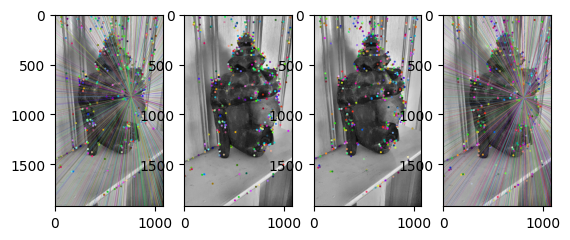

Rotation Matrix for image pair 0 and 1:
[[-0.90400337 -0.04002233  0.42564789]
 [-0.06164267 -0.97300325 -0.22240694]
 [ 0.42305802 -0.2272947   0.87713114]]
Translation Vector for image pair 0 and 1:
[-0.23885168  0.10728828 -0.96511093]
Fundamental Matrix for image pair 1 and 2:
[[-1.18683054e-07 -7.71650962e-06  8.43119804e-03]
 [ 7.88673222e-06  5.57095879e-08 -6.60187427e-03]
 [-8.74736300e-03  5.79304857e-03  9.99887621e-01]]


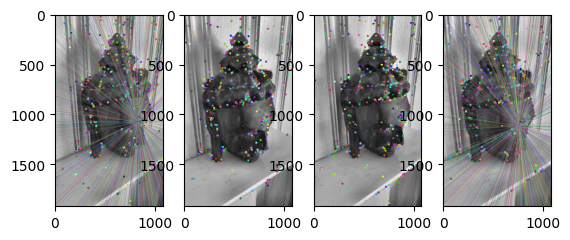

Rotation Matrix for image pair 1 and 2:
[[-0.89687428  0.05265822  0.43913965]
 [ 0.06122968 -0.96854385  0.24119234]
 [ 0.43802676  0.24320759  0.86543782]]
Translation Vector for image pair 1 and 2:
[-0.19650525 -0.14416849 -0.96984593]
Fundamental Matrix for image pair 2 and 3:
[[ 2.65695332e-07  1.24218611e-05 -1.29293297e-02]
 [-1.31942663e-05  4.76373720e-07  5.60471060e-03]
 [ 1.37543884e-02 -5.19396409e-03 -9.99792608e-01]]


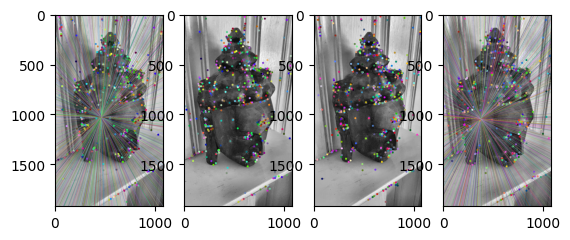

Rotation Matrix for image pair 2 and 3:
[[-0.97548352  0.01067867 -0.21981324]
 [-0.04336259 -0.98856758  0.14440852]
 [-0.21575815  0.15039981  0.96479444]]
Translation Vector for image pair 2 and 3:
[ 0.14796225 -0.08218669 -0.98557218]
Fundamental Matrix for image pair 3 and 4:
[[ 4.83742071e-07 -2.33330323e-05  1.91476255e-02]
 [ 2.47923730e-05 -3.41199832e-07 -1.78858632e-02]
 [-2.10809061e-02  1.72902645e-02  9.99284797e-01]]


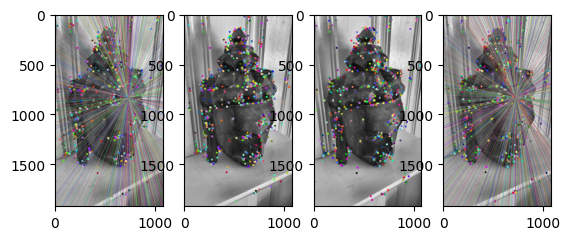

Rotation Matrix for image pair 3 and 4:
[[-0.94019208 -0.0411391   0.3381515 ]
 [-0.03660428 -0.97473183 -0.22035877]
 [ 0.33867239 -0.21955736  0.91492927]]
Translation Vector for image pair 3 and 4:
[-0.17110928  0.11231345 -0.97882956]
Fundamental Matrix for image pair 4 and 5:
[[ 9.86027185e-07  2.72440037e-05 -2.27087669e-02]
 [-2.83116263e-05  1.04911527e-06  2.70248782e-02]
 [ 2.17510655e-02 -2.80786318e-02  9.98745437e-01]]


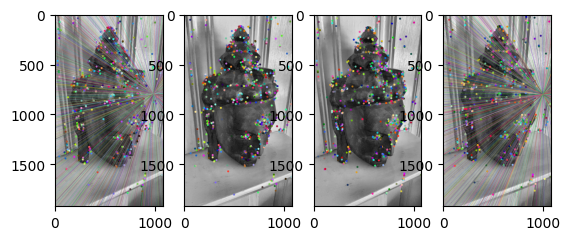

Rotation Matrix for image pair 4 and 5:
[[-0.70684128 -0.07053311  0.70384692]
 [-0.13610717 -0.96286242 -0.23317548]
 [ 0.69415434 -0.26061666  0.67099084]]
Translation Vector for image pair 4 and 5:
[-0.38819951  0.13250115 -0.91200032]
Fundamental Matrix for image pair 5 and 6:
[[-1.09270627e-06 -1.72556080e-05  1.20244262e-02]
 [ 1.45432195e-05 -2.51763706e-07 -2.69049148e-03]
 [-9.23833631e-03  4.11822228e-03 -9.99872926e-01]]


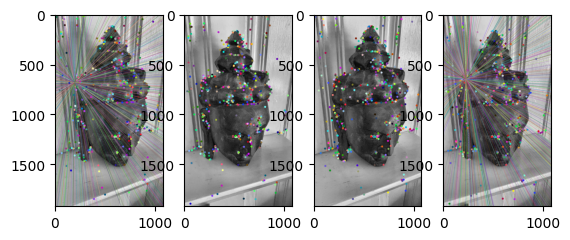

Rotation Matrix for image pair 5 and 6:
[[-0.8414882   0.17874982 -0.50984911]
 [ 0.10247292 -0.87374946 -0.47545891]
 [-0.53046858 -0.45233879  0.71693284]]
Translation Vector for image pair 5 and 6:
[ 0.26679327  0.26395317 -0.92690349]
Fundamental Matrix for image pair 6 and 7:
[[-1.81793439e-07  2.19217511e-05 -1.91840265e-02]
 [-2.38814875e-05  7.17182010e-07  1.92866719e-02]
 [ 2.08225569e-02 -1.85578480e-02 -9.99240724e-01]]


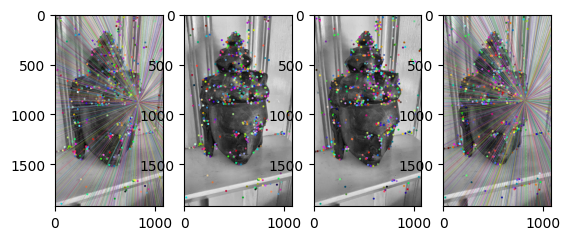

Rotation Matrix for image pair 6 and 7:
[[-0.86954018 -0.02529666  0.4932139 ]
 [-0.05316308 -0.98808944 -0.1444055 ]
 [ 0.49099243 -0.15178716  0.85783862]]
Translation Vector for image pair 6 and 7:
[-0.24858591  0.08426811 -0.96493727]
Fundamental Matrix for image pair 7 and 8:
[[-1.13181073e-07 -1.48449741e-05  1.59625204e-02]
 [ 1.54216931e-05  2.03500466e-08 -1.08850729e-02]
 [-1.64374917e-02  9.88794524e-03  9.99629306e-01]]


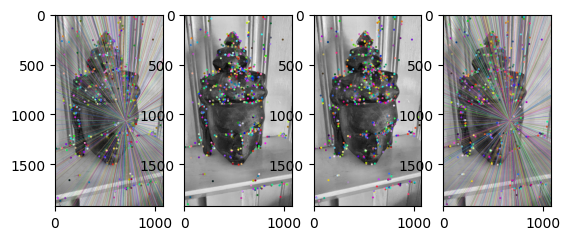

Rotation Matrix for image pair 7 and 8:
[[-0.96449722  0.02788264  0.26261696]
 [ 0.02580509 -0.97970232  0.19879001]
 [ 0.26282923  0.19850926  0.94420065]]
Translation Vector for image pair 7 and 8:
[-0.11668138 -0.10133025 -0.98798666]
Fundamental Matrix for image pair 8 and 9:
[[-3.88385635e-08 -2.36712039e-06 -4.96558426e-04]
 [ 2.73191533e-06 -9.18839412e-08 -1.74607218e-02]
 [ 1.04542125e-03  1.80335577e-02 -9.99684237e-01]]


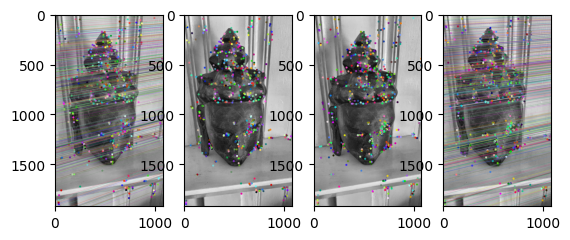

Rotation Matrix for image pair 8 and 9:
[[ 0.99867436 -0.04219016  0.02948745]
 [ 0.04232741  0.9990956  -0.00404548]
 [-0.0292901   0.00528825  0.99955696]]
Translation Vector for image pair 8 and 9:
[-0.97426755  0.16962231 -0.14842848]
Fundamental Matrix for image pair 9 and 10:
[[-2.58398996e-07 -1.04415305e-05  1.89463937e-02]
 [ 1.03475902e-05 -8.07207137e-08  2.86651303e-03]
 [-1.95200685e-02 -2.26826707e-03 -9.99623249e-01]]


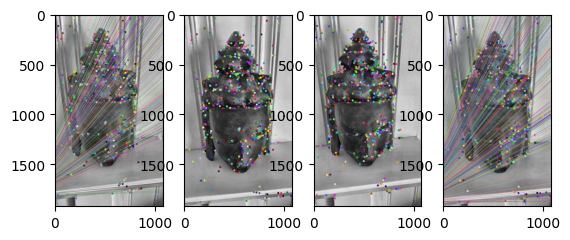

Rotation Matrix for image pair 9 and 10:
[[-0.51927643 -0.51838126 -0.67943569]
 [-0.56793075 -0.38475759  0.72760996]
 [-0.63859741  0.76370313 -0.09460911]]
Translation Vector for image pair 9 and 10:
[ 0.47775007 -0.5699076  -0.66855082]
Fundamental Matrix for image pair 10 and 11:
[[ 1.62365761e-06 -9.52468139e-06  1.18320957e-02]
 [ 8.67185794e-06 -4.82572738e-07  6.82273036e-04]
 [-1.28037769e-02 -9.05408186e-04  9.99847378e-01]]


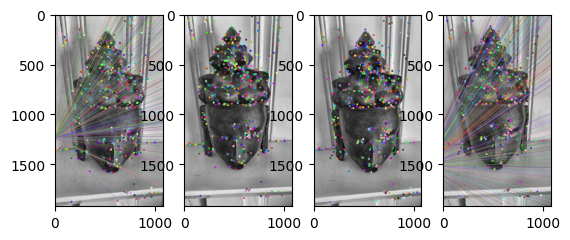

Rotation Matrix for image pair 10 and 11:
[[-0.54117102 -0.332793   -0.77225821]
 [-0.25739957 -0.80872056  0.52888233]
 [-0.80054943  0.48499472  0.35199536]]
Translation Vector for image pair 10 and 11:
[ 0.50645921 -0.39049636 -0.76877283]


In [ ]:
from sklearn.linear_model import RANSACRegressor
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# List for storing matched points across image pairs
img1_gp = []
img2_gp = []
normalized_images = []  # List for storing normalized images

# Normalize images
for img in Images:
    normalized_images.append(normalize_image(img))

# Camera matrix (intrinsic parameters)
height, width = normalized_images[0].shape[:2]
cam_matrix = np.array([[width, 0, width / 2], [0, width, height / 2], [0, 0, 1]])

# Fundamental matrix computation loop
transformation_matrix = np.eye(4)
for j in range(0, len(normalized_images) - 1):
    np.random.seed(42)
    ransac_threshold = 3.0
    
    # Feature matching
    _, _, Img1_gp, Img2_gp, _, _, _ = feature_matching(normalized_images[j], normalized_images[j + 1])
    img1_gp.append(Img1_gp)
    img2_gp.append(Img2_gp)

    # Filter inliers using RANSAC
    ransac = RANSACRegressor(residual_threshold=ransac_threshold, random_state=42)
    ransac.fit(img1_gp[j], img2_gp[j])
    inlier_mask = ransac.inlier_mask_
    inlier_img1_gp = img1_gp[j][inlier_mask]
    inlier_img2_gp = img2_gp[j][inlier_mask]

    # Construct matrix A for the fundamental matrix
    A = []
    for i in range(len(inlier_img1_gp)):
        x1, y1 = inlier_img1_gp[i]
        x2, y2 = inlier_img2_gp[i]
        A.append([x2 * x1, x2 * y1, x2, y2 * x1, y2 * y1, y2, x1, y1, 1])
    A = np.array(A)

    # Solve A.f = 0 using Singular Value Decomposition (SVD)
    U, D, Vt = np.linalg.svd(A)
    Funda = Vt[-1].reshape(3, 3)

    # Enforce rank-2 constraint
    U_cap, D_cap, Vt_cap = np.linalg.svd(Funda)
    D_cap[2] = 0  # Set the smallest singular value to 0
    Funda = U_cap @ np.diag(D_cap) @ Vt_cap

    # Print the fundamental matrix
    print(f"Fundamental Matrix for image pair {j} and {j+1}:\n{Funda}")

    # Epipolar Lines Visualization
    linesLeft = cv2.computeCorrespondEpilines(img2_gp[j].reshape(-1, 1, 2), 2, Funda) 
    linesLeft = linesLeft.reshape(-1, 3)
    img5, img6 = epipolar_lines(normalized_images[j], normalized_images[j + 1], linesLeft, img1_gp[j], img2_gp[j])

    linesRight = cv2.computeCorrespondEpilines(img1_gp[j].reshape(-1, 1, 2), 1, Funda)
    linesRight = linesRight.reshape(-1, 3)
    img3, img4 = epipolar_lines(normalized_images[j + 1], normalized_images[j], linesRight, img2_gp[j], img1_gp[j])

    plt.subplot(141), plt.imshow(img5)
    plt.subplot(142), plt.imshow(img6)
    plt.subplot(143), plt.imshow(img4)
    plt.subplot(144), plt.imshow(img3)
    plt.show()

    # Compute the Essential Matrix (E) from Fundamental Matrix (F)
    E = np.dot(cam_matrix.T, np.dot(Funda, cam_matrix))

    # Decompose the Essential Matrix to find rotation and translation
    U_E, D_E, Vt_E = np.linalg.svd(E)

    # Ensure determinant is positive for valid rotation matrices
    if np.linalg.det(U_E) < 0:
        U_E *= -1
    if np.linalg.det(Vt_E) < 0:
        Vt_E *= -1

    # Compute possible rotation matrices and translations
    W = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
    R1 = U_E @ W @ Vt_E
    R2 = U_E @ W.T @ Vt_E
    t1 = U_E[:, 2]
    t2 = -U_E[:, 2]

    # Select the best (R, t) pair based on the number of valid 3D points
    best_valid_points = 0
    best_rotation, best_translation = None, None

    P1 = np.dot(cam_matrix, np.hstack((np.identity(3), np.zeros((3, 1)))))

    for R, t in [(R1, t1), (R1, t2), (R2, t1), (R2, t2)]:
        P2 = np.dot(cam_matrix, np.hstack((R, t.reshape(3, 1))))
        points_3d = cv2.triangulatePoints(P1, P2, img1_gp[j].T, img2_gp[j].T)
        points_3d /= points_3d[3]

        valid_points = np.sum(points_3d[2, :] > 0)
        if valid_points > best_valid_points:
            best_valid_points = valid_points
            best_rotation = R
            best_translation = t

    final_R = best_rotation
    final_t = best_translation

    # Print rotation and translation matrices
    print(f"Rotation Matrix for image pair {j} and {j+1}:\n{final_R}")
    print(f"Translation Vector for image pair {j} and {j+1}:\n{final_t}")


# Bundle Adjustment

In [23]:
# Bundle Adjustment
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gtsam
import gtsam.utils.plot
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objs as go
from plotly.subplots import make_subplots

normalized_images = [] # List for storing normalized images
for i in Images:
    normalized_images.append(normalize_image(i))
height, width = normalized_images[0].shape[:2]
gtsam_cam_matrix = gtsam.Cal3_S2(width, width, 0.0, width/2, height/2) #fx,fy,skew,cx,cy
#print(gtsam_cam_matrix)
graph = gtsam.NonlinearFactorGraph() # Creating an Empty Factor Graph
initial = gtsam.Values() # Initializing values, creating instance of class Values, basically creating an empty container

pose_noise = gtsam.noiseModel.Diagonal.Sigmas([1,1,1,1,1,1])
point_noise = gtsam.noiseModel.Isotropic.Sigma(3,1) #3= no. of dimensions in our case X,Y,Z of the 3D point in the world
measurement_noise = gtsam.noiseModel.Isotropic.Sigma(2,1) #2 = no. of dimensions in our case Ximg, Yimg of the point in the pixel 
camera_pose = gtsam.symbol_shorthand.X
landmark_pose = gtsam.symbol_shorthand.L
# Adding initial vertex/storing initial estimate of the factor (roll, pitch, yaw, x, y, z)
initial.insert(camera_pose(0), gtsam.Pose3()) # rot=0,0,0, trans=0,0,0
_,_,gt_img1_gp, gt_img2_gp,_,gt_img1_idx, gt_img2_idx = feature_matching(normalized_images[0], normalized_images[1]) # This good points has both inliers and outliers

#print(gt_img1_gp.shape)
temp_gt_img1_gp = gt_img1_gp
temp_gt_img2_gp = gt_img2_gp
E_matrix, E_mask = cv2.findEssentialMat(temp_gt_img2_gp, temp_gt_img1_gp, cam_matrix, cv2.RANSAC, 0.999, 1.0)
#print(E_mask)
E_mask = np.squeeze(E_mask!=0)
#print(E_mask)
index_mask = np.arange(len(temp_gt_img1_gp))
index_mask = index_mask[E_mask]  # Obtaining points with essential_mask = 1
temp_gt_img1_gp=temp_gt_img1_gp[E_mask]
temp_gt_img2_gp=temp_gt_img2_gp[E_mask]
_,rotation, translation, mask = cv2.recoverPose(E_matrix, temp_gt_img2_gp, temp_gt_img1_gp, cam_matrix)  # recovering the relative pose between two calibrated cameras from their corresponding essential matrix and a set of corresponding points. 

mask = np.squeeze(mask!=0)
index= index_mask[mask]
#print(index)
#print("Before line 47:", gt_img1_gp.shape)
gt_img1_gp = gt_img1_gp[index]
#print("After line 47:", gt_img1_gp.shape)
gt_img2_gp = gt_img2_gp[index] # removing outliers
gt_img1_idx = gt_img1_idx[index]
gt_img2_idx = gt_img2_idx[index]

#print(gt_img1_gp)

initial.insert(camera_pose(1), gtsam.Pose3(gtsam.Rot3(rotation), gtsam.Point3(translation.flatten())))
transformation_matrices = []
projection_matrices = []
transformation_mat = np.eye(4)
transformation_mat[:3,:] = np.hstack((rotation, translation)) # transformation = [R|t], dimension = 3x4
projection_mat = cam_matrix.dot(np.linalg.inv(transformation_mat)[:3]) # dimension = (3x3) * (3x4), 3x4 becasue on taking inverse of a 4x3 matrix we have 3x4
transformation_matrices.append(transformation_mat)
projection_matrices.append(projection_mat)
src_projection_matrix = cam_matrix.dot(np.hstack((np.eye(3), np.zeros((3, 1)))))


dest_projection_matrix = projection_mat


bp = cv2.triangulatePoints(src_projection_matrix, dest_projection_matrix, gt_img1_gp.T, gt_img2_gp.T) # finding all the interest points from budha sculpture
bp = (bp/bp[-1])[:-1].T # removing the last or the 4th line
All_bp = list(bp)
old_trans_mat = transformation_mat.copy()# referencing so that new copy is created and any modification to them doesnot affect the original variable value
old_proj_mat = projection_mat.copy()
# Now that we have added the vertex or the initials we will now add the edge or factor to the graph
graph.add(gtsam.PriorFactorPose3(camera_pose(0), gtsam.Pose3(), pose_noise)) #adding prior for pose or adding initial pose factor at x,y,z = 0,0,0 or the origin
graph.add(gtsam.PriorFactorPoint3(landmark_pose(0),All_bp[0], point_noise)) #adding prior for 3D points of buddha or adding initial landmark factor at x,y,z 
total_ob_c = [] # For storing the total observed intensity of a landmark in pixels
total_ob_co = [] # For storing the count of observations for each landmark, This count basically reflects how many times each landmark has been observed durint the bundle adjustment, this is shifted or incremented by 2 each time because at a time we are working on 2 images
key = []
feat = []
bp_index = [] # Keeps track of indices of keypoint for each image
for img in normalized_images:
    desc = cv2.SIFT_create(nfeatures=4000, nOctaveLayers=12, contrastThreshold=0.025, sigma=1.5)
    k,f = desc.detectAndCompute(img, None)
    key.append(np.array(k))
    feat.append(np.array(f))
    bp_index.append(np.full(len(k), -1, int))
img1_obj = bp_index[0]
img2_obj = bp_index[1]
img1norm = raw_Images[0]
img2norm = raw_Images[1]
img1_rint =np.rint(gt_img1_gp).astype(int)  #converting from float type to rounded integer type
img2_rint = np.rint(gt_img2_gp).astype(int)
for obj_idx, (src_point, dst_point, src_point_index, dst_point_index, obj_pt, rint_src_point, rint_dst_point) in enumerate(zip(gt_img1_gp, gt_img2_gp, gt_img1_idx, gt_img2_idx,All_bp,img1_rint,img2_rint)):
    img1_obj[src_point_index] = obj_idx
    img2_obj[dst_point_index] = obj_idx
    # Adding the measurement factor into the graph for bundle adjustment
    graph.add(gtsam.GenericProjectionFactorCal3_S2(src_point,measurement_noise,camera_pose(0),landmark_pose(obj_idx),gtsam_cam_matrix)) # measurement seen from camera_1 in pixel coordinates
    graph.add(gtsam.GenericProjectionFactorCal3_S2(dst_point,measurement_noise,camera_pose(1),landmark_pose(obj_idx),gtsam_cam_matrix)) # measurement seen from camera_2 in pixel_coordinates
    total_ob_c.append(img1norm[rint_src_point[1], rint_dst_point[0]] + img2norm[rint_dst_point[1],rint_src_point[0]])
    total_ob_co.append(2) #because here we are only working with image 1 and 2 to observe the output 
#print(total_ob_co)

# Now working on rest of the images 
for i in range(1, len(normalized_images)-1):
    _,_,gt_img1_gp_all, gt_img2_gp_all,_,gt_img1_idx_all, gt_img2_idx_all = feature_matching(normalized_images[i], normalized_images[i+1]) # This good points has both inliers and outliers
    tempo_gt_img1_gp_all = gt_img1_gp_all
    tempo_gt_img2_gp_all = gt_img2_gp_all
    E_matrix_all, E_mask_all = cv2.findEssentialMat(tempo_gt_img2_gp_all, tempo_gt_img1_gp_all, cam_matrix, cv2.RANSAC,0.999,1.0)
    E_mask_all = np.squeeze(E_mask_all!=0)
    index_mask_all = np.arange(len(tempo_gt_img1_gp_all))
    index_mask_all = index_mask_all[E_mask_all]
    tempo_gt_img1_gp_all = tempo_gt_img1_gp_all[E_mask_all]
    tempo_gt_img2_gp_all = tempo_gt_img2_gp_all[E_mask_all]
    _, rotation_all, translation_all, mask_all = cv2.recoverPose(E_matrix_all, tempo_gt_img2_gp_all, tempo_gt_img1_gp_all, cam_matrix)
    mask_all = np.squeeze(mask_all!=0)
    index_all= index_mask_all[mask_all]
    gt_img1_gp_all = gt_img1_gp_all[index_all]
    gt_img2_gp_all = gt_img2_gp_all[index_all]
    gt_img1_idx_all = gt_img1_idx_all[index_all]
    gt_img2_idx_all = gt_img2_idx_all[index_all]
    


    transformation_mat = np.eye(4)
    #print(old_trans_mat)
    transformation_mat[:3,:] = (np.hstack((rotation_all, translation_all))).dot(old_trans_mat) # transformation = [R|t], dimension = 3x4
    projection_mat = cam_matrix.dot(np.linalg.inv(transformation_mat)[:3]) # dimension = (3x3) * (3x4), 3x4 becasue on taking inverse of a 4x3 matrix we have 3x4
    
    #print(transformation_mat)
    
    img1_obj = bp_index[i]
    img2_obj = bp_index[i+1]
    img1norm = raw_Images[i]
    img2norm = raw_Images[i+1]
    m_i1_p =[]
    m_i2_p = []
    m_bp=[]
    for src_point, dst_point, src_point_index in zip(gt_img1_gp_all,gt_img2_gp_all, gt_img1_idx_all):
        obj_idx=img1_obj[src_point_index]
        if obj_idx!=-1:
            m_i1_p.append(src_point)
            m_i2_p.append(dst_point)
            m_bp.append(All_bp[obj_idx]/(total_ob_co[obj_idx]-1))
    m_i1_p=np.array(m_i1_p)
    m_i2_p=np.array(m_i2_p)
    m_bp=np.array(m_bp)

  
    bp = cv2.triangulatePoints(old_proj_mat, projection_mat, m_i1_p.T, m_i2_p.T)
    bp = (bp/bp[-1])[:-1].T

    # Scaling needs to be done to adjust the translation part between the adjustent images
    scale = 0
    for m_obj_p, object_point in zip(m_bp, bp):
        scale = scale + cv2.norm(m_obj_p)/cv2.norm(object_point)
    scale = scale/len(bp)
    translation_all = translation_all * scale

    # using scale to calculate new tranformation matrix
    transformation_mat = np.eye(4)
    transformation_mat[:3,:] = (np.hstack((rotation_all, translation_all))).dot(old_trans_mat) # transformation = [R|t], dimension = 3x4
    initial.insert(camera_pose(i+1), gtsam.Pose3(gtsam.Rot3(transformation_mat[:3,:3]), gtsam.Point3(transformation_mat[:3,3])))
    projection_mat = cam_matrix.dot(np.linalg.inv(transformation_mat)[:3]) # dimension = (3x3) * (3x4), 3x4 becasue on taking inverse of a 4x3 matrix we have 3x4
    bp = cv2.triangulatePoints(old_proj_mat, projection_mat, gt_img1_gp_all.T, gt_img2_gp_all.T)
    bp = (bp/bp[-1])[:-1].T
    old_trans_mat = transformation_mat.copy()
    old_proj_mat=projection_mat.copy()
    rint_src_point = np.rint(gt_img1_gp_all).astype(int)
    rint_dst_point = np.rint(gt_img2_gp_all).astype(int)
    curr_obj_idx = len(total_ob_co)
    
    for src_point, dst_point, src_point_index, dst_point_index, object_point, rint_src_point, rint_dst_point in zip(gt_img1_gp_all, gt_img2_gp_all, gt_img1_idx_all, gt_img2_idx_all, bp, rint_src_point, rint_dst_point):
        obj_idx = img1_obj[src_point_index]
        if obj_idx==-1:
            obj_idx=curr_obj_idx
            All_bp.append(object_point)
            total_ob_c.append(img1norm[rint_src_point[1], rint_src_point[0]] + img2norm[rint_dst_point[1], rint_dst_point[0]])
            total_ob_co.append(2)
            img1_obj[src_point_index] = img2_obj[dst_point_index] = obj_idx
            curr_obj_idx=curr_obj_idx+1
        else:
            img2_obj[dst_point_index] = obj_idx
            All_bp[obj_idx] = All_bp[obj_idx] + object_point
            total_ob_c[obj_idx] = total_ob_c[obj_idx] + img2norm[rint_dst_point[1], rint_src_point[0]]
            total_ob_co[obj_idx] = total_ob_co[obj_idx] + 1
        graph.add(gtsam.GenericProjectionFactorCal3_S2(src_point, measurement_noise, camera_pose(i), landmark_pose(obj_idx), gtsam_cam_matrix))
        graph.add(gtsam.GenericProjectionFactorCal3_S2(dst_point, measurement_noise, camera_pose(i+1), landmark_pose(obj_idx), gtsam_cam_matrix))

total_ob_co = np.array([total_ob_co, total_ob_co, total_ob_co]).T
total_obj_pts = np.array(All_bp)/(total_ob_co-1)
total_ob_c=np.flip(np.array(total_ob_c)/total_ob_co).astype(np.uint8)
for obj_idx, obj_point in enumerate(total_obj_pts):
    initial.insert(landmark_pose(obj_idx), gtsam.Point3(obj_point))
params = gtsam.LevenbergMarquardtParams()
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initial, params)
result = optimizer.optimize()

# PLOTING
final_object_points = []
for index in range(len(total_obj_pts)):
    final_object_points.append(result.atPoint3(landmark_pose(index)))
final_object_points = np.array(final_object_points)
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter_trace = go.Scatter3d(x=final_object_points[:, 0], y=final_object_points[:, 1], z=final_object_points[:, 2], mode='markers', marker=dict( size=1,color=total_ob_c/255.,),)
fig.add_trace(scatter_trace)
fig.update_layout(scene=dict(xaxis=dict(range=[-30, 30]),yaxis=dict(range=[-30, 30]),zaxis=dict(range=[-30, 30]),aspectmode='data'), width=1200,height=1200)
#fig.update_layout(scene=dict(xaxis=dict(range=[-30, 30]),yaxis=dict(range=[-30, 30]),zaxis=dict(range=[-30, 30]),aspectmode='data'))
fig.show()


Courtsey ZZ's and Jitesh code for refernce and logic